# Using Machine Learning to detect Under-representation in Twitter #indiedev's.

The following project attempts to detect under-presented users and statuses in Twitter that promote indiegame development. Under-representation will be technically defined as accounts below certain threshold of average RT-ability and exposure within the network.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The data used here comes from extractions of #indiedev Twitter statuses between last weeks of February and first weeks of March 2017.


In [16]:
d = pd.read_pickle('ig_final')
d = d.drop_duplicates()

Get a dataframe of authors.


In [17]:
d.columns

Index([                  u'id',  u'in_reply_to_user_id',
                      u'RT_id',           u'created_at',
             u'favorite_count',        u'retweet_count',
                       u'text',               u'usr_id',
             u'usr_created_at',             u'usr_lang',
               u'usr_location',   u'usr_statuses_count',
       u'usr_favourites_count',        u'usr_time_zone',
               u'usr_verified',            u'RT_userid',
                    u'RT_time',      u'usr_screen_name',
                   u'usr_name',            u'RTOU_name'],
      dtype='object')

In [18]:
userd = d[[u'usr_id',u'usr_created_at',u'usr_lang',u'usr_location',
           u'usr_statuses_count',u'usr_favourites_count',u'usr_time_zone',
           u'usr_verified']]
userd = userd.drop_duplicates()

A simple survey on status and authors.


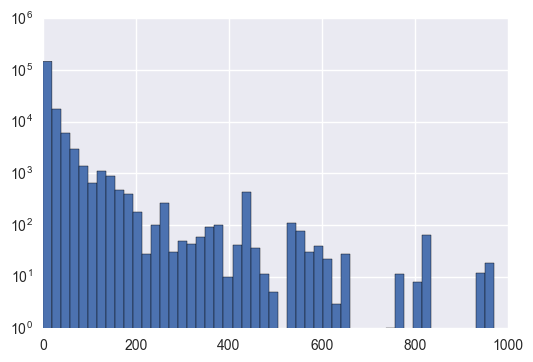

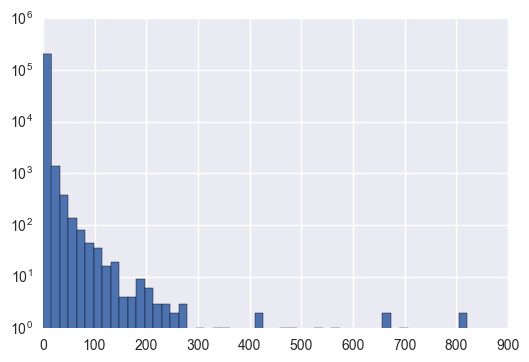

In [36]:
#Status
plt.hist(d[d.retweet_count < 1000].retweet_count,bins=50)
plt.yscale('log')
plt.show()

plt.hist(d[d.favorite_count < 1000].favorite_count,bins=50)
plt.yscale('log')
plt.show()

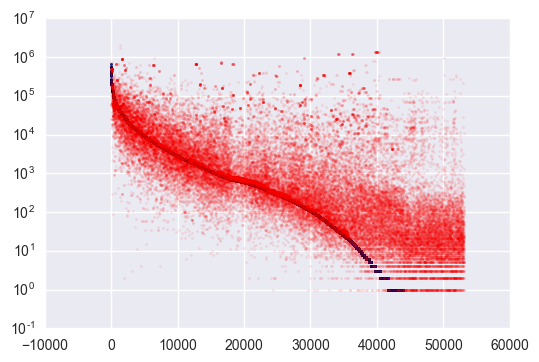

In [67]:
#Users
sort_userd = userd.sort_values('usr_favourites_count',ascending=False)
size = len(sort_userd)
plt.scatter(np.arange(0,size),
            list(sort_userd.usr_favourites_count),
            s=3)
plt.yscale('log')
plt.scatter(np.arange(0,size),
            list(sort_userd.usr_statuses_count),
            color='r',
            alpha=0.1,
            s=3,
            linewidth=0.1)
plt.yscale('log')
plt.xlim(0,)
plt.show()

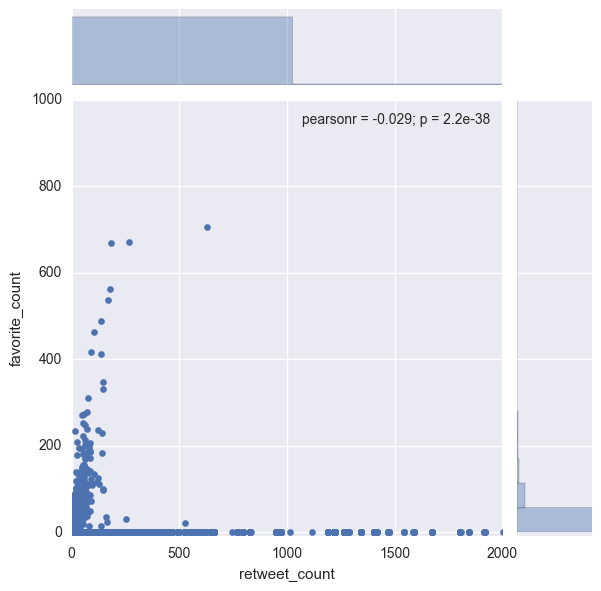

In [83]:
sns.jointplot(d.retweet_count,d.favorite_count,xlim=(0,2000))
plt.ylim(-10,1000)
plt.xlim(0,2000)
plt.show()

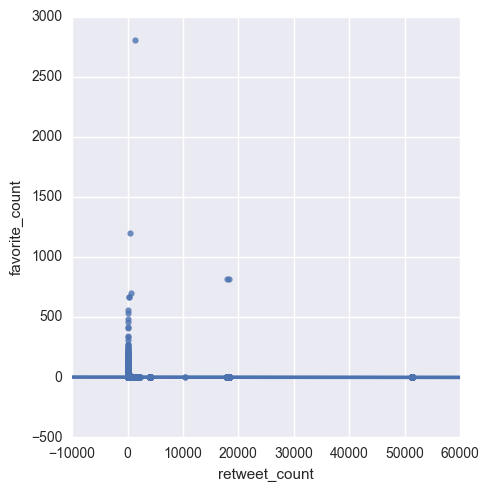

In [84]:
sns.lmplot('retweet_count','favorite_count',d) 

In [38]:
#Followers missing.

In [49]:
a

,usr_id,usr_created_at,usr_lang,usr_location,usr_statuses_count,usr_favourites_count,usr_time_zone,usr_verified
48,858651145,Tue Oct 02 20:15:29 +0000 2012,en,,726580,648360,London,False
99,1874836183,Tue Sep 17 09:17:07 +0000 2013,en,,440033,568135,Pacific Time (US & Canada),False
35,96323946,Sat Dec 12 11:15:51 +0000 2009,en,Hong Kong,199794,561853,Hong Kong,False
43,96323946,Sat Dec 12 11:15:51 +0000 2009,en,Hong Kong,199773,561787,Hong Kong,False
64,873780536,Thu Oct 11 15:03:43 +0000 2012,en,Aboard the Leviathan,701931,439069,Eastern Time (US & Canada),False
41,65472747,Thu Aug 13 21:27:43 +0000 2009,ja,日本 東京,501294,426794,Tokyo,False
72,16317733,Tue Sep 16 21:16:11 +0000 2008,en,Pakistan,497366,392788,Islamabad,False
78,16317733,Tue Sep 16 21:16:11 +0000 2008,en,Pakistan,497360,392781,Islamabad,False
17,16317733,Tue Sep 16 21:16:11 +0000 2008,en,Pakistan,497355,392775,Islamabad,False
25,711919143302336512,Mon Mar 21 14:15:25 +0000 2016,it,,487127,353645,None,False


In [ ]:
}